In [1]:
import numpy as np

In [2]:
import sys
!{sys.executable} -m pip install ipympl

In [3]:
from fitparse import FitFile
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
filename = './WEMBLEY_WHEELSPIN.fit'
filename = './Wahoo_RGT_Moonriders_Heroica_4_2.fit'
filename = './Zwift_Race_3R_Racing_A_on_Tick_Tock_in_Watopia.fit'
filename = './Zwift_Race_STAGE_3_RACE_LONDON_London_Classique_Reverse_A_on_Classique_Reverse_in_London.fit'
filename = "./Etoile_des_Saisies_.fit"
#filename = "./HILLINGDON_CIRCUIT_.fit"

fitfile = FitFile(filename)
plt.figure()
while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
df = pd.DataFrame(workout)
plt.show()

<Figure size 640x480 with 0 Axes>

In [4]:
df.columns

Index(['altitude', 'cadence', 'cycle_length', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate',
       'left_right_balance', 'position_lat', 'position_long', 'power', 'speed',
       'stance_time', 'stance_time_percent', 'temperature', 'timestamp',
       'vertical_oscillation', 'unknown_14', 'unknown_15'],
      dtype='object')

In [10]:
df.distance

0           0.00
1           0.11
2           0.11
3           0.11
4           0.11
          ...   
2867    34078.45
2868    34090.65
2869    34113.94
2870    34137.32
2871    34154.97
Name: distance, Length: 2872, dtype: float64

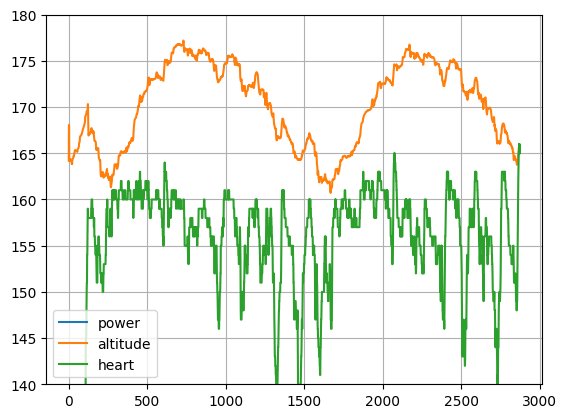

In [12]:
plt.figure()
plt.plot(df.power, label = "power")
plt.plot(df.altitude/10, label = "altitude")
plt.grid()
plt.plot(df.heart_rate, label = 'heart')
plt.legend()
plt.ylim([140,180])
plt.show()

In [6]:
def fit2df(filename):

    fitfile = FitFile(filename)
    while True:
        try:
            fitfile.messages
            break
        except KeyError:
            continue
    workout = []
    for record in fitfile.get_messages('record'):
        r = {}
        for record_data in record:
            r[record_data.name] = record_data.value
        workout.append(r)
    df = pd.DataFrame(workout)
    return df

In [7]:
def power_curve(df):
    x = np.logspace(0, np.log10(len(df)), 100, endpoint = False)
    power_curve = [df.power.rolling(int(nb)+1).mean().max() for nb in x]
    return x, power_curve

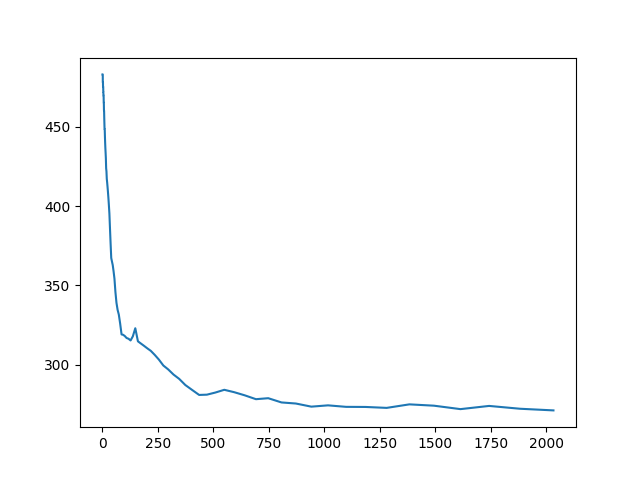

In [8]:
f = power_curve(fit2df(filename))
plt.plot(f[0], f[1])
plt.show()

In [9]:
df.columns

Index(['altitude', 'cadence', 'cycle_length', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate',
       'left_right_balance', 'position_lat', 'position_long', 'power', 'speed',
       'stance_time', 'stance_time_percent', 'temperature', 'timestamp',
       'vertical_oscillation', 'unknown_14', 'unknown_15'],
      dtype='object')

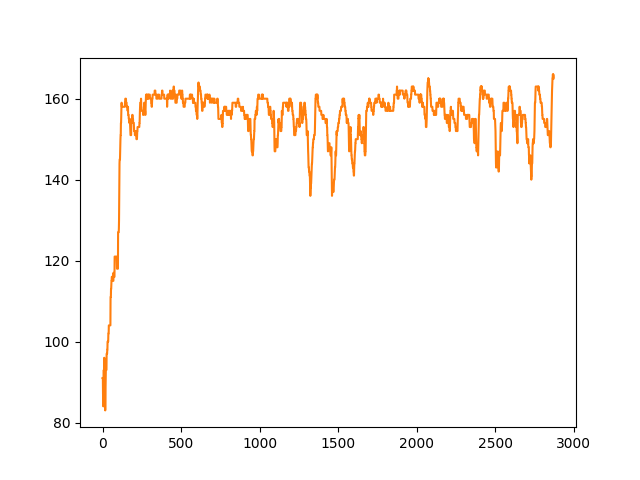

In [10]:
plt.figure()
plt.plot(df.power)
plt.plot(df.heart_rate)
plt.show()

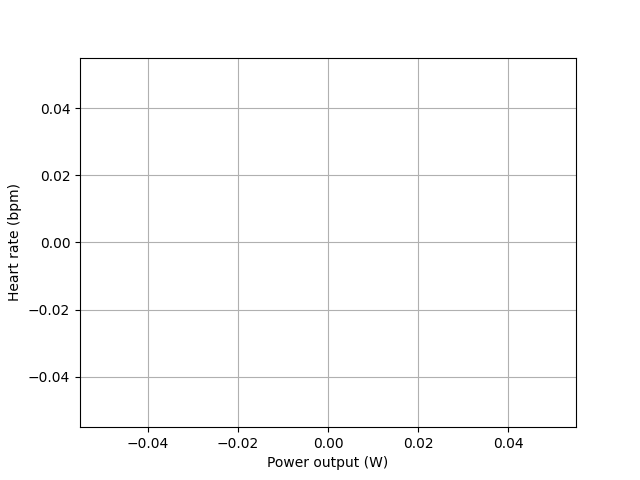

In [11]:
nb_periods = 15
cmap = plt.cm.get_cmap('viridis')
plt.figure()
for i, (pw, hr) in enumerate(zip(np.array_split(df.power, nb_periods), np.array_split(df.heart_rate, nb_periods))):
    plt.plot(pw, hr, 'x-', color=cmap(float(i/nb_periods)))
plt.ylabel("Heart rate (bpm)")
plt.xlabel("Power output (W)")
#plt.title("Power map vs heart rate")
plt.grid()
plt.show()

In [12]:
def find_best(seri, nb_elts):
    max = 0
    for s in range(len(seri) - nb_elts):
        tmp = seri[s:s+nb_elts].mean()
        if tmp > max: 
            max = tmp
    return max
find_best(df.power, 10)

0

In [13]:
%timeit df.power.rolling(2).mean().max()

539 µs ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
df.power.rolling(10).mean().max()

nan

In [15]:
%timeit find_best(df.power, 2)

387 ms ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
x2 = np.logspace(0, np.log10(1679), 100, endpoint = False)

In [17]:
import numpy as np
x = np.logspace(0, np.log10(len(df.power)), 100, endpoint = False)

In [18]:
 # Calculate the time vector in seconds
time_data = np.cumsum([m.get_value('timestamp').time_from_start for m in power_messages])
time_data = time_data - time_data[0]

NameError: name 'power_messages' is not defined

In [19]:
power_curve_2 = [df.power.rolling(int(nb)+1).mean().max() for nb in x]

In [20]:
df.timestamp[0].strftime("%d/%m/%y")

'02/04/23'

In [23]:
filename = "./Zwift_Race_GGCC_Race_Series_B_on_The_Muckle_Yin_in_Scotland.fit"
filename = "./Wahoo_RGT_WEST_LONDON_VR_RACE_6_12_WEMBLEY_WHEELSPIN.fit"

# split the string by dot and get the first and last element
first_word, last_word = filename.split("_")[:1] + filename.split("_")[-1:]

print("First word:", first_word[2:])
print("Last word:", last_word[:-4])

def getfirstlast(filename):
    first_word, last_word = filename.split("_")[:1] + filename.split("_")[-1:]
    return first_word[2:] + " " + last_word[:-4]

getfirstlast(filename)


First word: Wahoo
Last word: WHEELSPIN


'Wahoo WHEELSPIN'

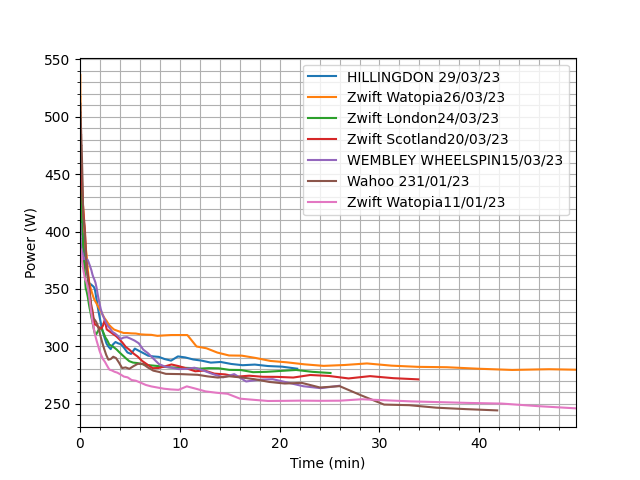

In [30]:
#%matplotlib inline
%matplotlib widget

filename = "./Zwift_Race_GGCC_Race_Series_B_on_The_Muckle_Yin_in_Scotland.fit"

filenames = ['./HILLINGDON_CIRCUIT_.fit','./Zwift_Race_After_Party_Race_by_PETA_Z_A_on_Volcano_Climb_After_Party_in_Watopia.fit','./Zwift_Race_STAGE_3_RACE_LONDON_London_Classique_Reverse_A_on_Classique_Reverse_in_London.fit',  './Zwift_Race_GGCC_Race_Series_B_on_The_Muckle_Yin_in_Scotland.fit', './WEMBLEY_WHEELSPIN.fit' ,'./Wahoo_RGT_Moonriders_Heroica_4_2.fit','./Zwift_Race_3R_Racing_A_on_Tick_Tock_in_Watopia.fit']

for fname in filenames:
    df = fit2df(fname)
    f = power_curve(df) 

    plt.plot(f[0]/60, f[1], label = getfirstlast(fname) + df.timestamp[0].strftime("%d/%m/%y"))


plt.xlabel("Time (min)")
plt.ylabel("Power (W)")
plt.legend()
plt.minorticks_on()
plt.xlim([0, f[0].max()/60])
plt.grid(which='both')

In [ ]:
ftp = 275
norm_power = np.sqrt(np.sqrt(np.mean(df['power'].rolling(30).mean() ** 4)))
intensity = norm_power / ftp
tss = (len(df.power) * norm_power * intensity) / (ftp * 3600.0) * 100.0
print('\n'
      'NP: {} W \n'
      'Training Stres S: {} \n'
      'Intensity Factor: {}'.format(str(round(norm_power, 1)), str(round(tss, 1)), str(round(intensity, 2))))

## Power model

$ H(t+1) = \frac{\alpha H(t) + \beta - P(t)}{\tau} $

where $ P = \alpha H + \beta $ in steady state.

In [ ]:
tau_r = 60 # recovery
tau_a = 60 # action
hr_idle = 50
hr_vo2max = 170
power_vo2max = 320


a = (hr_vo2max-hr_idle) / power_vo2max
alpha = 1/a
beta = -hr_idle/a

def hr_p(p):
    return hr_idle + a * p

def hr_t(hr, power, tau_a, tau_r, alpha, beta):
    power_th = alpha * hr + beta
    if power_th > power: # recovery
        tau = -tau_a
    else:
        tau = -tau_r
    return hr + (power_th - power) / tau


In [ ]:
hr = df.heart_rate[0]
print(hr)
hr_calc = []
for i in range(len(df[:])):
    new_hr = hr_t(hr, df.power[i], tau_a, tau_r, alpha, beta)
    hr_calc.append(new_hr)
    hr = new_hr

In [ ]:
plt.figure()
plt.plot(hr_calc, label= "calc")
plt.plot(df.heart_rate, label = "real")
plt.legend()
plt.grid()
plt.show()

In [ ]:
age = 43
height = 1.71
weight = 61

Pmax = (2160 * height - 9.63 * age + 4.0 * weight -2413) * 0.163
Pmax

In [ ]:
HRmax = 208 - 0.7 * age
HRmax